# Property listings in Kuala Lumpur

# --==DATA UNDERSTANDING==--

In [227]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [195]:
df = pd.read_csv('data_kaggle.csv')

In [196]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [197]:
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [199]:
print('Unique Location :', df['Location'].nunique())
print('Unique Price :', df['Price'].nunique())
print('Unique Rooms :', df['Rooms'].nunique())
print('Unique Property Type :', df['Property Type'].nunique())
print('Unique Size :', df['Size'].nunique())
print('Unique Furnishing :', df['Furnishing'].nunique())

Unique Location : 112
Unique Price : 4280
Unique Rooms : 43
Unique Property Type : 99
Unique Size : 6190
Unique Furnishing : 4


In [200]:
df.isna().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [201]:
df.duplicated().sum()

4467

# --==DATA PREPARATION==--

## Mengambil sample dari dataset

In [202]:
df_sample = df.sample(frac=0.2)

In [203]:
df_sample = df_sample.reset_index()

df_sample = df_sample.drop(['index'], axis=1)
df_sample.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"Wangsa Maju, Kuala Lumpur","RM 1,318,350",3+1,3.0,2.0,Condominium,"Built-up : 1,668 sq. ft.",Partly Furnished
1,"Desa ParkCity, Kuala Lumpur","RM 1,580,000",5,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Land area : 22X75 sq. ft.,Partly Furnished
2,"Mont Kiara, Kuala Lumpur","RM 3,500,000",5+1,6.0,2.0,Semi-detached House (Intermediate),Land area : 3600 sq. ft.,Partly Furnished
3,"KLCC, Kuala Lumpur","RM 950,000",1,1.0,1.0,Condominium (Intermediate),Built-up : 753 sq. ft.,Fully Furnished
4,"Cheras, Kuala Lumpur","RM 530,000",3+1,2.0,NaN,Condominium (Intermediate),"Built-up : 1,142 sq. ft.",Unfurnished


## Mengubah price menjadi numeric

In [204]:
df_price = df_sample.copy()

df_price = df_price['Price'].replace({'RM ': '', ',': ''}, regex=True).astype(float)

df_floatPrice = df_sample.copy()
df_floatPrice.Price = df_price

print(df_floatPrice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777 entries, 0 to 10776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       10777 non-null  object 
 1   Price          10727 non-null  float64
 2   Rooms          10447 non-null  object 
 3   Bathrooms      10395 non-null  float64
 4   Car Parks      7279 non-null   float64
 5   Property Type  10775 non-null  object 
 6   Size           10569 non-null  object 
 7   Furnishing     9462 non-null   object 
dtypes: float64(3), object(5)
memory usage: 673.7+ KB
None


## Drop kolom Size

In [205]:
df_noSize = df_floatPrice.drop(['Size'], axis=1)

In [206]:
df_noSize.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,"Wangsa Maju, Kuala Lumpur",1318350.0,3+1,3.0,2.0,Condominium,Partly Furnished
1,"Desa ParkCity, Kuala Lumpur",1580000.0,5,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Partly Furnished
2,"Mont Kiara, Kuala Lumpur",3500000.0,5+1,6.0,2.0,Semi-detached House (Intermediate),Partly Furnished
3,"KLCC, Kuala Lumpur",950000.0,1,1.0,1.0,Condominium (Intermediate),Fully Furnished
4,"Cheras, Kuala Lumpur",530000.0,3+1,2.0,NaN,Condominium (Intermediate),Unfurnished


## Ringkas Location

In [207]:
df_noSize.Location.unique()

array(['Wangsa Maju, Kuala Lumpur', 'Desa ParkCity, Kuala Lumpur',
       'Mont Kiara, Kuala Lumpur', 'KLCC, Kuala Lumpur',
       'Cheras, Kuala Lumpur', 'Kepong, Kuala Lumpur',
       'Damansara Heights, Kuala Lumpur', 'OUG, Kuala Lumpur',
       'Ampang Hilir, Kuala Lumpur', 'Jalan Kuching, Kuala Lumpur',
       'Setapak, Kuala Lumpur', 'Sentul, Kuala Lumpur',
       'Bukit Jalil, Kuala Lumpur', 'Dutamas, Kuala Lumpur',
       'Ampang, Kuala Lumpur', 'Taman Melawati, Kuala Lumpur',
       'Bukit Tunku (Kenny Hills), Kuala Lumpur',
       'Taman Duta, Kuala Lumpur', 'Kuchai Lama, Kuala Lumpur',
       'Pantai, Kuala Lumpur', 'Taman Tun Dr Ismail, Kuala Lumpur',
       'Bangsar, Kuala Lumpur', 'KL Sentral, Kuala Lumpur',
       'Sungai Besi, Kuala Lumpur', 'Sri Hartamas, Kuala Lumpur',
       'Taman Desa, Kuala Lumpur', 'Titiwangsa, Kuala Lumpur',
       'Bangsar South, Kuala Lumpur', 'Keramat, Kuala Lumpur',
       'Jalan Klang Lama (Old Klang Road), Kuala Lumpur',
       'City Centr

In [208]:
df_location = df_noSize['Location'].replace({', Kuala Lumpur': ''}, regex=True)

df_shortLoc = df_noSize.copy()
df_shortLoc.Location = df_location

In [209]:
df_shortLoc

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,Wangsa Maju,1318350.0,3+1,3.0,2.0,Condominium,Partly Furnished
1,Desa ParkCity,1580000.0,5,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Partly Furnished
2,Mont Kiara,3500000.0,5+1,6.0,2.0,Semi-detached House (Intermediate),Partly Furnished
3,KLCC,950000.0,1,1.0,1.0,Condominium (Intermediate),Fully Furnished
4,Cheras,530000.0,3+1,2.0,NaN,Condominium (Intermediate),Unfurnished
...,...,...,...,...,...,...,...
10772,Mont Kiara,1390000.0,3+2,4.0,2.0,Condominium (Corner),Fully Furnished
10773,Setapak,500000.0,3,2.0,1.0,Apartment (Intermediate),Fully Furnished
10774,Mont Kiara,2500000.0,4+1,6.0,3.0,Condominium,Fully Furnished
10775,Ampang,2200000.0,5+1,6.0,NaN,3-sty Terrace/Link House (Intermediate),Partly Furnished


# Mengubah rooms menjadi numerik

In [210]:
df_shortLoc.Rooms.unique()

array(['3+1', '5', '5+1', '1', '3', nan, '4', 'Studio', '3+2', '5+2', '6',
       '6+1', '1+1', '2', '4+1', '2+1', '9+1', '6+', '7', '4+2', '8',
       '7+1', '2+2', '9', '10', '7+', '11', '8+1', '8+', '15+', '10+',
       '14', '20 Above'], dtype=object)

In [214]:
df_rooms = df_shortLoc.copy()
df_rooms
df_rooms = df_rooms['Rooms'].replace({'4\+1': '5', '3\+1': '4', '5\+1': '6', '3\+2': '5', '5\+2': '7', '2\+1': '3',
                                     '6\+1': '7', 'Studio': '1', '7\+1': '8', '1\+1': '2', '4\+2': '6',
                                     '2\+2': '4', '8\+': '8', '6\+':'6', '8\+1':'9', '7\+':'7', '20 Above':'20',
                                     '9\+1': '10', '11\+1': '12', '12\+': '12', '10\+':'10', '1\+2': '3',
                                     '13\+': '13', '15\+' : '15'}, regex=True).astype(float)

df_floatRooms = df_shortLoc.copy()
df_floatRooms.Rooms = df_rooms

print(df_floatRooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777 entries, 0 to 10776
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       10777 non-null  object 
 1   Price          10727 non-null  float64
 2   Rooms          10447 non-null  float64
 3   Bathrooms      10395 non-null  float64
 4   Car Parks      7279 non-null   float64
 5   Property Type  10775 non-null  object 
 6   Furnishing     9462 non-null   object 
dtypes: float64(4), object(3)
memory usage: 589.5+ KB
None


In [215]:
df_floatRooms

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,Wangsa Maju,1318350.0,4.0,3.0,2.0,Condominium,Partly Furnished
1,Desa ParkCity,1580000.0,5.0,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Partly Furnished
2,Mont Kiara,3500000.0,6.0,6.0,2.0,Semi-detached House (Intermediate),Partly Furnished
3,KLCC,950000.0,1.0,1.0,1.0,Condominium (Intermediate),Fully Furnished
4,Cheras,530000.0,4.0,2.0,NaN,Condominium (Intermediate),Unfurnished
...,...,...,...,...,...,...,...
10772,Mont Kiara,1390000.0,5.0,4.0,2.0,Condominium (Corner),Fully Furnished
10773,Setapak,500000.0,3.0,2.0,1.0,Apartment (Intermediate),Fully Furnished
10774,Mont Kiara,2500000.0,5.0,6.0,3.0,Condominium,Fully Furnished
10775,Ampang,2200000.0,6.0,6.0,NaN,3-sty Terrace/Link House (Intermediate),Partly Furnished


## Menghapus nilai null dan duplikat

In [216]:
df_clean = df_floatRooms.dropna()
df_clean = df_clean.drop_duplicates()

df_clean.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,Wangsa Maju,1318350.0,4.0,3.0,2.0,Condominium,Partly Furnished
1,Desa ParkCity,1580000.0,5.0,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Partly Furnished
2,Mont Kiara,3500000.0,6.0,6.0,2.0,Semi-detached House (Intermediate),Partly Furnished
3,KLCC,950000.0,1.0,1.0,1.0,Condominium (Intermediate),Fully Furnished
7,OUG,620000.0,3.0,2.0,2.0,1.5-sty Terrace/Link House (Intermediate),Partly Furnished


In [217]:
df_clean = df_clean.reset_index()

df_clean = df_clean.drop(['index'], axis=1)
df_clean.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,Wangsa Maju,1318350.0,4.0,3.0,2.0,Condominium,Partly Furnished
1,Desa ParkCity,1580000.0,5.0,4.0,4.0,2.5-sty Terrace/Link House (Intermediate),Partly Furnished
2,Mont Kiara,3500000.0,6.0,6.0,2.0,Semi-detached House (Intermediate),Partly Furnished
3,KLCC,950000.0,1.0,1.0,1.0,Condominium (Intermediate),Fully Furnished
4,OUG,620000.0,3.0,2.0,2.0,1.5-sty Terrace/Link House (Intermediate),Partly Furnished


In [218]:
print('nilai null')
print(df_clean.isna().sum())
print('')
print('nilai dupe')
print(df_clean.duplicated().sum())

nilai null
Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Furnishing       0
dtype: int64

nilai dupe
0


## Menghapus Outlier

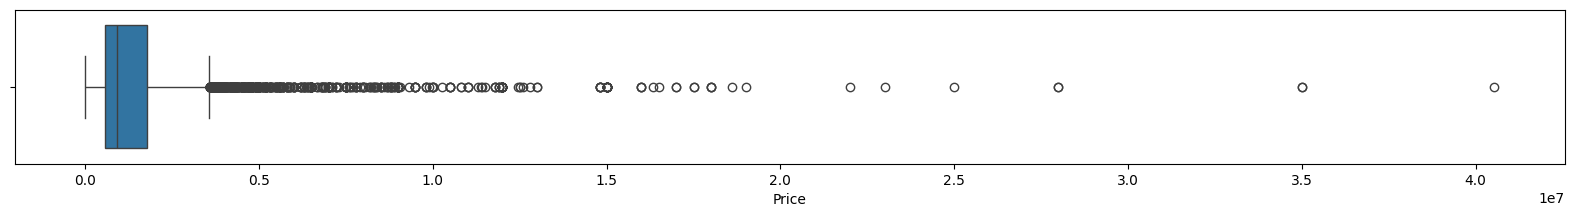

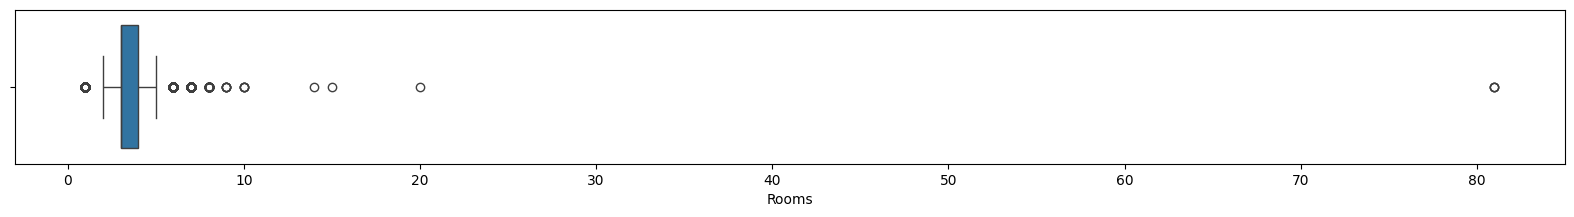

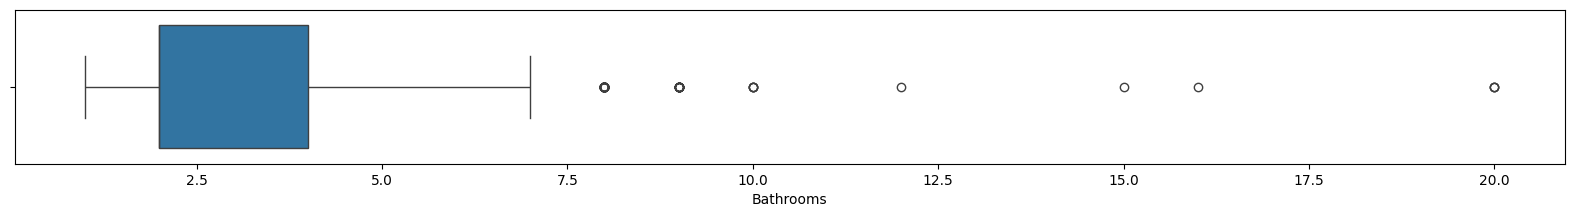

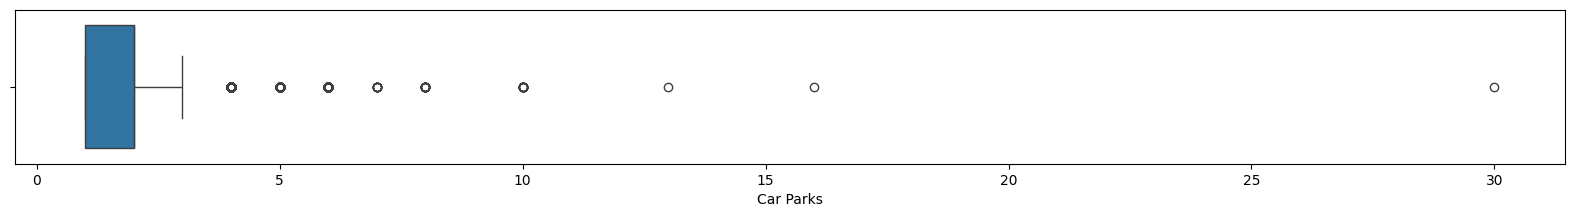

In [219]:
df_outlier = df_clean.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [220]:
q1 = df_clean.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df_clean.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1

batas_bawah = q1 - (1.5 * iqr)
batas_atas = q3 + (1.5 * iqr)

df_noout = df_clean[~((df_clean.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df_clean.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

df_ex_object = df_noout.select_dtypes(exclude=['object'])
outlier_filter = ((df_ex_object < batas_bawah) | (df_ex_object > batas_atas))

for col in outlier_filter.columns :

    # Exclude kolom dengan tipe data object
    if df_noout[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: Price
Price
False    4812
Name: count, dtype: int64
-------------------
Nama Kolom: Rooms
Rooms
False    4812
Name: count, dtype: int64
-------------------
Nama Kolom: Bathrooms
Bathrooms
False    4812
Name: count, dtype: int64
-------------------
Nama Kolom: Car Parks
Car Parks
False    4812
Name: count, dtype: int64
-------------------


## Visualisasi Data

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
df_display = df_noout.copy()

In [247]:
print(df_display.Location.value_counts())

Location
Mont Kiara                           566
Cheras                               422
KLCC                                 412
Jalan Klang Lama (Old Klang Road)    346
Setapak                              323
Bukit Jalil                          310
Kepong                               175
Sentul                               144
Dutamas                              127
Taman Desa                           124
Desa ParkCity                        120
Sungai Besi                          116
Wangsa Maju                          111
Segambut                             102
Jalan Kuching                         92
Bangsar                               91
Kuchai Lama                           91
Taman Tun Dr Ismail                   88
KL Sentral                            81
KL City                               78
Ampang                                74
Sri Petaling                          72
Bandar Menjalara                      69
Bangsar South                         60
Bukit B

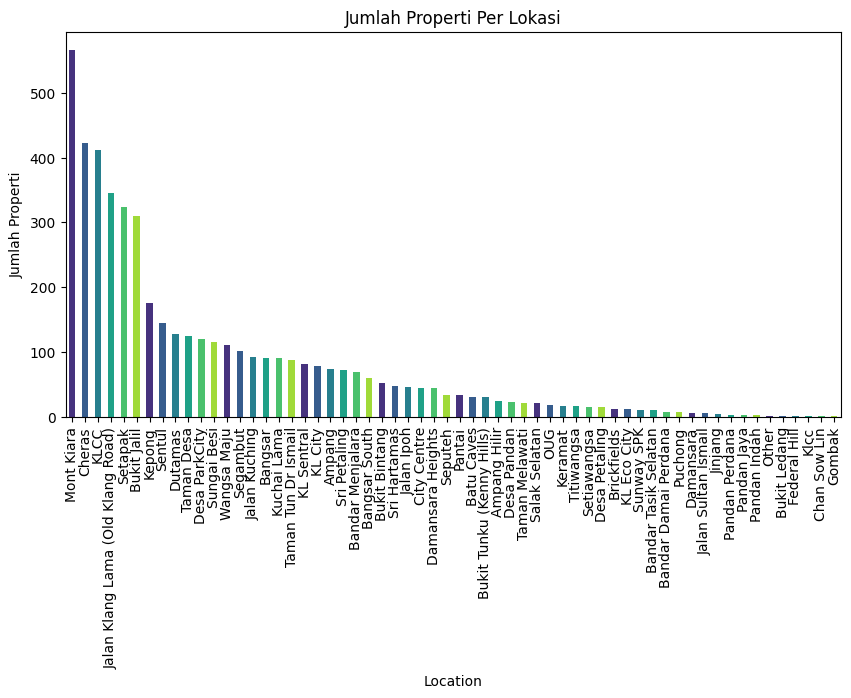

In [248]:
Location_Count = df_display.Location.value_counts()

plt.figure(figsize=(10,5))

myColors = sns.color_palette('viridis')
Location_Count.plot(kind='bar',color=myColors)
plt.ylabel('Jumlah Properti')
plt.title('Jumlah Properti Per Lokasi')
plt.show()

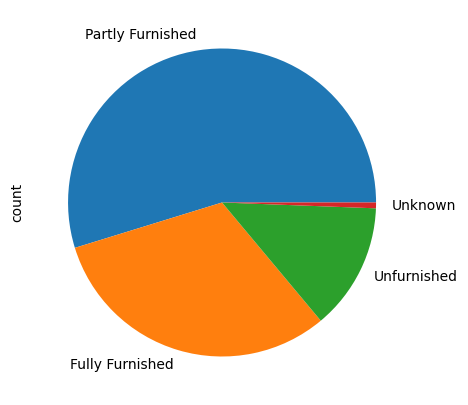

In [249]:
plot = df_display['Furnishing'].value_counts().plot.pie(y=df_display['Furnishing'].value_counts(), figsize=(5, 5))

## Encoding categorical

In [250]:
df_label = df_noout.copy()
df_label.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing
0,Wangsa Maju,1318350.0,4.0,3.0,2.0,Condominium,Partly Furnished
4,OUG,620000.0,3.0,2.0,2.0,1.5-sty Terrace/Link House (Intermediate),Partly Furnished
6,Setapak,776554.0,4.0,3.0,2.0,Condominium (Intermediate),Fully Furnished
7,Sentul,1650000.0,5.0,5.0,2.0,Condominium,Partly Furnished
8,Dutamas,530000.0,3.0,2.0,1.0,Condominium,Partly Furnished


In [251]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 0 to 6226
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4812 non-null   object 
 1   Price          4812 non-null   float64
 2   Rooms          4812 non-null   float64
 3   Bathrooms      4812 non-null   float64
 4   Car Parks      4812 non-null   float64
 5   Property Type  4812 non-null   object 
 6   Furnishing     4812 non-null   object 
dtypes: float64(4), object(3)
memory usage: 300.8+ KB


In [252]:
print('Unique Location :', df_label['Location'].nunique())
print('Unique Property Type :', df_label['Property Type'].nunique())

Unique Location : 60
Unique Property Type : 60


In [253]:
df_label = df_label.drop(['Location', 'Property Type'], axis=1)
df_label

,Price,Rooms,Bathrooms,Car Parks,Furnishing
0,1318350.0,4.0,3.0,2.0,Partly Furnished
4,620000.0,3.0,2.0,2.0,Partly Furnished
6,776554.0,4.0,3.0,2.0,Fully Furnished
7,1650000.0,5.0,5.0,2.0,Partly Furnished
8,530000.0,3.0,2.0,1.0,Partly Furnished
...,...,...,...,...,...
6220,680000.0,4.0,4.0,2.0,Partly Furnished
6221,706562.0,2.0,2.0,1.0,Partly Furnished
6224,1390000.0,5.0,4.0,2.0,Fully Furnished
6225,500000.0,3.0,2.0,1.0,Fully Furnished


In [254]:
col_encode = ['Furnishing']

result = preprocessing.LabelEncoder()

df_label[col_encode] = df_label[col_encode].apply(result.fit_transform)

In [255]:
df_label.head()

,Price,Rooms,Bathrooms,Car Parks,Furnishing
0,1318350.0,4.0,3.0,2.0,1
4,620000.0,3.0,2.0,2.0,1
6,776554.0,4.0,3.0,2.0,0
7,1650000.0,5.0,5.0,2.0,1
8,530000.0,3.0,2.0,1.0,1


# --==Data Modelling==--

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [257]:
df_final = df_label.copy()

In [258]:
df_final

,Price,Rooms,Bathrooms,Car Parks,Furnishing
0,1318350.0,4.0,3.0,2.0,1
4,620000.0,3.0,2.0,2.0,1
6,776554.0,4.0,3.0,2.0,0
7,1650000.0,5.0,5.0,2.0,1
8,530000.0,3.0,2.0,1.0,1
...,...,...,...,...,...
6220,680000.0,4.0,4.0,2.0,1
6221,706562.0,2.0,2.0,1.0,1
6224,1390000.0,5.0,4.0,2.0,0
6225,500000.0,3.0,2.0,1.0,0


In [261]:
df_final.describe()

,Price,Rooms,Bathrooms,Car Parks,Furnishing
count,4.812000e+03,4812.000000,4812.000000,4812.000000,4812.000000
mean,1.018751e+06,3.316708,2.597257,1.676850,0.832086
std,6.945468e+05,0.879728,0.998594,0.638035,0.665122
min,5.300000e+02,2.000000,1.000000,1.000000,0.000000
25%,5.200000e+05,3.000000,2.000000,1.000000,0.000000
50%,7.650000e+05,3.000000,2.000000,2.000000,1.000000
75%,1.330000e+06,4.000000,3.000000,2.000000,1.000000
max,3.570000e+06,5.000000,7.000000,3.000000,3.000000


In [259]:
train_X,validation_X, train_y,validation_y = train_test_split(X,y,random_state=0)

In [260]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)

diamonds_pred = forest_model.predict(validation_X)
# rounds up the mean absolute error to two decimal places
mse = round(mean_absolute_error(validation_y,diamonds_pred),2)

print('Mean Absolute Error:', mse)

rmse = np.sqrt(mse)

print('Root Mean Absolute Error:', rmse)

Mean Absolute Error: 728876.54
Root Mean Absolute Error: 853.7426661471243
